https://www.kaggle.com/hypnobear/absenteeism-at-work-dataset

https://www.kaggle.com/chetnasureka/absenteeismatwork/kernels

https://www.kaggle.com/shreytiwari/name-na

https://www.kaggle.com/miner16078/zenith-classification-and-clustering

https://www.kaggle.com/tejprash/theaggregatr-assign6

https://www.kaggle.com/kerneler/starter-absenteeism-at-work-7c360987-f

https://www.kaggle.com/dweepa/outliers-assign6


## Machine Learning Project in Python Step-By-Step
You need to see how all of the pieces of a predictive modeling machine learning project actually
fit together. In this lesson you will complete your first machine learning project using Python.
In this step-by-step tutorial project you will:
- Download and install Python SciPy and get the most useful package for machine learning
in Python.
- Load a dataset and understand its structure using statistical summaries and data visual-
ization.
- Create 6 machine learning models, pick the best and build confidence that the accuracy is
reliable.
If you are a machine learning beginner and looking to finally get started using Python, this
tutorial was designed for you.


In this tutorial we are going to work through a small machine learning project end-to-end.
Here is an overview of what we are going to cover:

1. Loading the dataset.
2. Summarizing the dataset.
3. Visualizing the dataset.
4. Evaluating some algorithms.
5. Making some predictions.

Take your time and work through each step. Try to type in the commands yourself or
copy-and-paste the commands to speed things up. Start your Python interactive environment
and let's get started with your hello world machine learning project in Python.

In [1]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('Absenteeism_at_work.csv')

In [3]:
data.head(20)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,30,2
5,3,23,7,6,1,179,51,18,38,239.554,97,0,1,31,2
6,10,22,7,6,1,361,52,3,28,239.554,97,0,1,27,8
7,20,23,7,6,1,260,50,11,36,239.554,97,0,1,23,4
8,14,19,7,2,1,155,12,14,34,239.554,97,0,1,25,40
9,1,22,7,2,1,235,11,14,37,239.554,97,0,3,29,8


In [4]:
print(data.shape)

(740, 15)


## Statistical Summary
Now we can take a look at a summary of each attribute. This includes the count, mean, the
min and max values as well as some percentiles.

In [6]:
# descriptions
print(data.describe())

               ID  Reason for absence  Month of absence  Day of the week  \
count  740.000000          740.000000        740.000000       740.000000   
mean    18.017568           19.216216          6.324324         3.914865   
std     11.021247            8.433406          3.436287         1.421675   
min      1.000000            0.000000          0.000000         2.000000   
25%      9.000000           13.000000          3.000000         3.000000   
50%     18.000000           23.000000          6.000000         4.000000   
75%     28.000000           26.000000          9.000000         5.000000   
max     36.000000           28.000000         12.000000         6.000000   

          Seasons  Transportation expense  Distance from Residence to Work  \
count  740.000000              740.000000                       740.000000   
mean     2.544595              221.329730                        29.631081   
std      1.111831               66.952223                        14.836788   
min

## Class Distribution
Let's take a look at the number of instances (rows) that belong to each class. We can view this
as an absolute count.

In [8]:
# class distribution
print(data.groupby('ID').size())

ID
1      23
2       6
3     113
4       1
5      19
6       8
7       6
8       2
9       8
10     24
11     40
12      7
13     15
14     29
15     37
16      2
17     20
18     16
19      3
20     42
21      3
22     46
23      8
24     30
25     10
26      5
27      7
28     76
29      5
30      7
31      3
32      5
33     24
34     55
35      1
36     34
dtype: int64


In [9]:
class_counts = data.groupby('Reason for absence').size()
print(class_counts)

Reason for absence
0      43
1      16
2       1
3       1
4       2
5       3
6       8
7      15
8       6
9       4
10     25
11     26
12      8
13     55
14     19
15      2
16      3
17      1
18     21
19     40
21      6
22     38
23    149
24      3
25     31
26     33
27     69
28    112
dtype: int64


In [10]:
class_counts = data.groupby('Month of absence').size()
print(class_counts)

Month of absence
0      3
1     50
2     72
3     87
4     53
5     64
6     54
7     67
8     54
9     53
10    71
11    63
12    49
dtype: int64


In [11]:
class_counts = data.groupby('Day of the week').size()
print(class_counts)

Day of the week
2    161
3    154
4    156
5    125
6    144
dtype: int64


In [12]:
class_counts = data.groupby('Seasons').size()
print(class_counts)

Seasons
1    170
2    192
3    183
4    195
dtype: int64


In [13]:
class_counts = data.groupby('Transportation expense').size()
print(class_counts)

Transportation expense
118     92
155     29
157      7
179    180
184      7
189      8
225     81
228      8
231      2
233      7
235     58
246     30
248     24
260     42
268      3
279      6
289     45
291     40
300      5
330     16
361     24
369     15
378      8
388      3
dtype: int64


In [14]:
class_counts = data.groupby('Distance from Residence to Work').size()
print(class_counts)

Distance from Residence to Work
5       6
10     55
11     26
12     29
13     34
14      9
15      9
16     26
17     15
20     19
22     20
25     54
26    128
27      7
29     14
31     37
35      2
36     40
42      7
45      1
48      5
49      8
50     45
51    120
52     24
dtype: int64


In [15]:
class_counts = data.groupby('Service time').size()
print(class_counts)

Service time
1       7
3      24
4      16
6       7
7       7
8      13
9     126
10     55
11     50
12     61
13     73
14     85
15      4
16     38
17     20
18    147
24      2
29      5
dtype: int64


In [16]:
class_counts = data.groupby('Age').size()
print(class_counts)

Age
27      7
28    117
29      7
30     46
31     22
32     13
33     51
34     29
36     50
37     78
38    113
39      8
40     58
41     34
43     24
46      2
47     24
48      6
49      5
50     37
53      1
58      8
dtype: int64


In [17]:
class_counts = data.groupby('Hit target').size()
print(class_counts)

Hit target
81      19
87      12
88      28
91      45
92      79
93     105
94      34
95      75
96      75
97      89
98      66
99     102
100     11
dtype: int64


In [18]:
class_counts = data.groupby('Disciplinary failure').size()
print(class_counts)

Disciplinary failure
0    700
1     40
dtype: int64


In [19]:
class_counts = data.groupby('Education').size()
print(class_counts)

Education
1    611
2     46
3     79
4      4
dtype: int64


In [20]:
class_counts = data.groupby('Body mass index').size()
print(class_counts)

Body mass index
19     46
21     22
22     35
23     75
24     86
25    126
27     24
28     59
29     23
30     40
31    147
32     24
33      6
34      1
35      2
36      5
38     19
dtype: int64


In [21]:
class_counts = data.groupby('Absenteeism time in hours').size()
print(class_counts)

Absenteeism time in hours
0       44
1       88
2      157
3      112
4       60
5        7
7        1
8      208
16      19
24      16
32       6
40       7
48       1
56       2
64       3
80       3
104      1
112      2
120      3
dtype: int64


## Data Visualization
We now have a basic idea about the data. We need to extend this with some visualizations. We
are going to look at two types of plots:
- Univariate plots to better understand each attribute.
- Multivariate plots to better understand the relationships between attributes.


## Univariate Plots
We will start with some univariate plots, that is, plots of each individual variable. Given that
the input variables are numeric, we can create box and whisker plots of each.

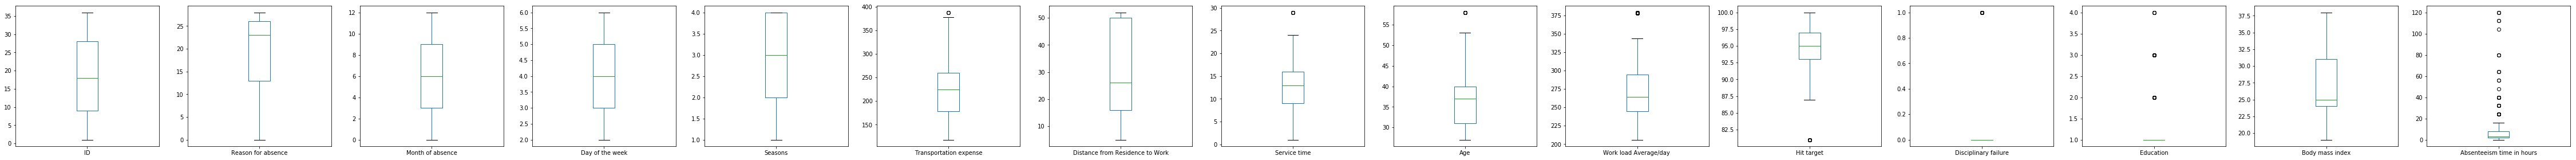

In [25]:
data.plot(kind='box', subplots=True, layout=(15,15), sharex=False, sharey=False, figsize=(80, 80))
pyplot.show()

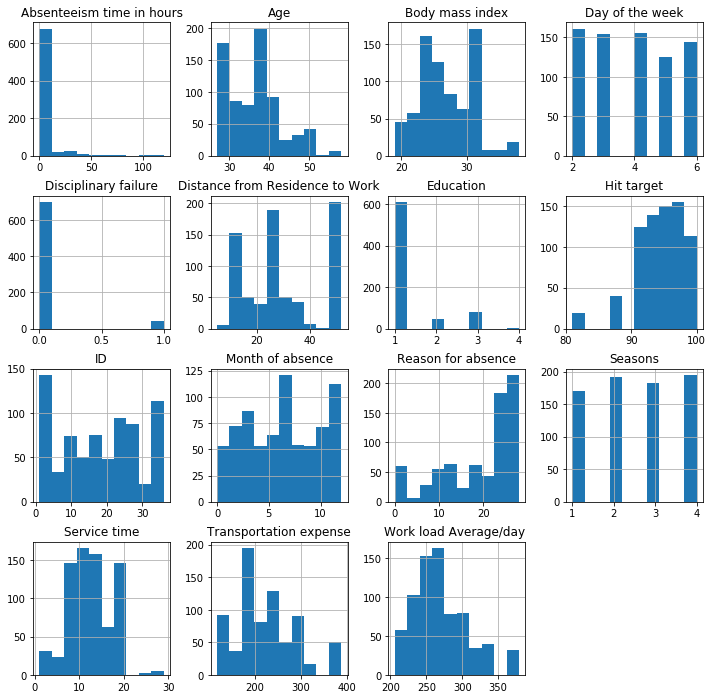

In [28]:
# histograms
data.hist(figsize=(12,12))
pyplot.show()

## Multivariate Plots
Now we can look at the interactions between the variables. Let's look at scatter plots of all
pairs of attributes. This can be helpful to spot structured relationships between input variables.

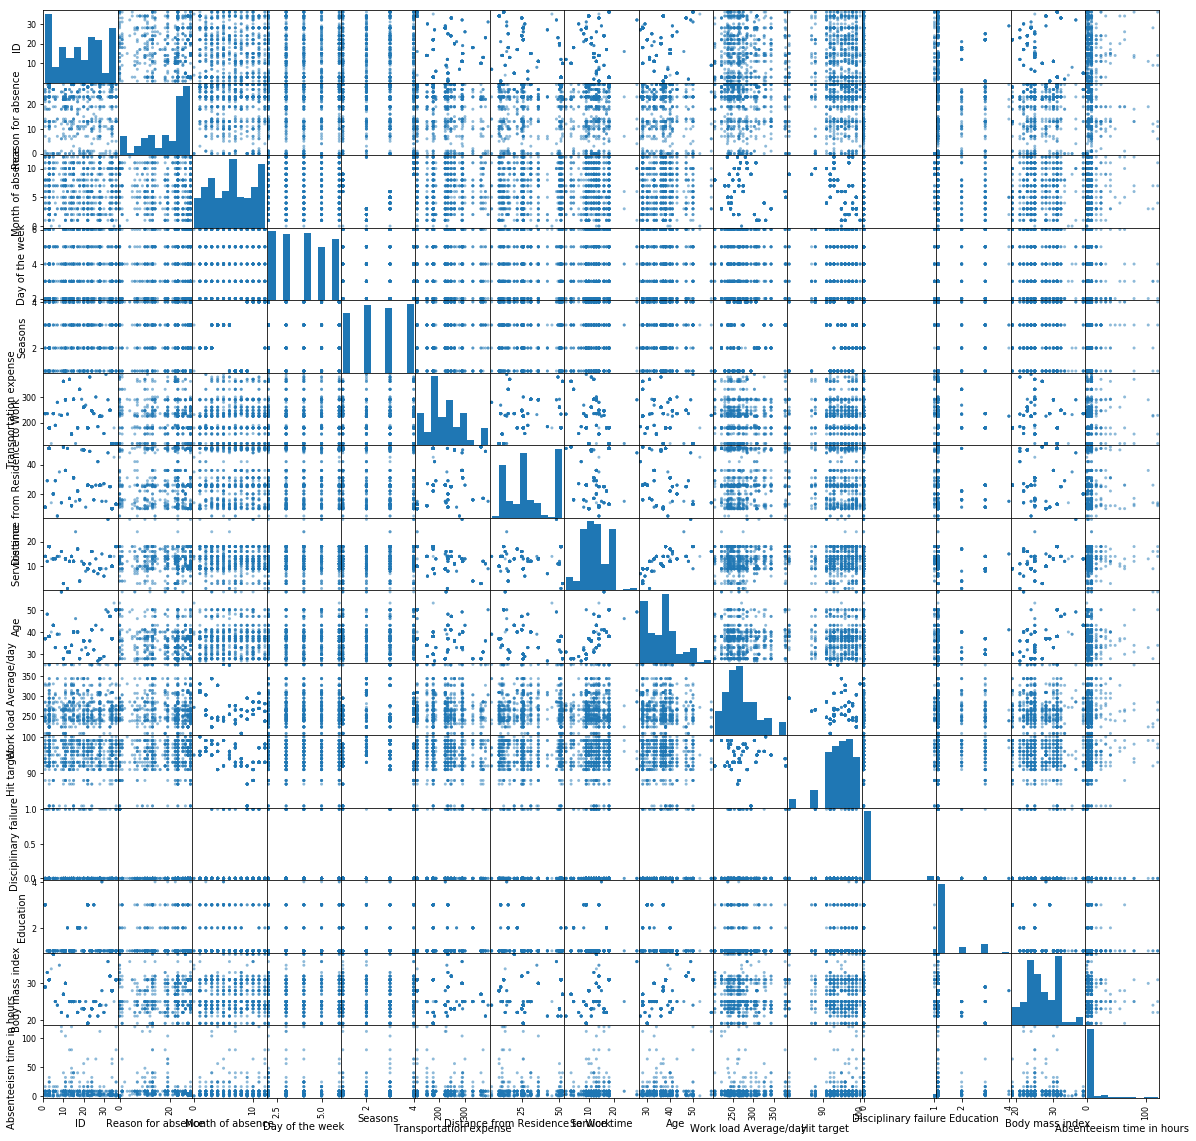

In [30]:
# scatter plot matrix
scatter_matrix(data, figsize=(20, 20))
pyplot.show()

## Evaluate Some Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data.
Here is what we are going to cover in this step:
1. Separate out a validation dataset.
2. Setup the test harness to use 10-fold cross-validation.
3. Build 5 dierent models to predict species from 
ower measurements
4. Select the best model.


## Create a Validation Dataset
We need to know whether or not the model that we created is any good. Later, we will use
statistical methods to estimate the accuracy of the models that we create on unseen data.
We also want a more concrete estimate of the accuracy of the best model on unseen data by
evaluating it on actual unseen data. That is, we are going to hold back some data that the
algorithms will not get to see and we will use this data to get a second and independent idea of

In [32]:
# Split-out validation dataset
array = data.values
X = array[:,0:15]
Y = array[:,14]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [40]:
Y[:5]

array([4., 0., 2., 4., 2.])

In [42]:
Y_train[:5]

array([40.,  3.,  2.,  2.,  8.])

## Test Harness
We will use 10-fold cross-validation to estimate accuracy on unseen data. This will split our
dataset into 10 parts, e.g. the model will train on 9 and test on 1 and repeat for all combinations
of train-test splits. We are using the metric of accuracy to evaluate models. This is a proportion
of the number of correctly predicted instances divided by the total number of instances in the
dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring
variable when we run build and evaluate each model next.


## Build Models
We don't know which algorithms would be good on this problem or what congurations to use.
We got an idea from the plots that some of the classes are partially linearly separable in some
dimensions, so we are expecting generally good results. Let's evaluate six dierent algorithms:
- Logistic Regression (LR).
- Linear Discriminant Analysis (LDA).
- k-Nearest Neighbors (KNN).
- Classication and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).


This list is a good mixture of simple linear (LR and LDA), and nonlinear (KNN, CART,
NB and SVM) algorithms. We reset the random number seed before each run to ensure that
the evaluation of each algorithm is performed using exactly the same data splits. It ensures the
results are directly comparable. Let's build and evaluate our ve models:

In [33]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-pa

LR: 0.623305 (0.020061)
LDA: 0.427401 (0.053010)
KNN: 0.386893 (0.050403)
CART: 0.976412 (0.015351)
NB: 0.974689 (0.015567)


/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/felipemartinezs/.local/lib/pyth

SVM: 0.410621 (0.043353)


/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Select The Best Model
We now have 6 models and accuracy estimations for each. We need to compare the models to
each other and select the most accurate. Running the example above, we get the following raw
results:


We can see that it looks like KNN has the largest estimated accuracy score. We can also
create a plot of the model evaluation results and compare the spread and the mean accuracy
of each model. There is a population of accuracy measures for each algorithm because each
algorithm was evaluated 10 times (10 fold cross-validation).

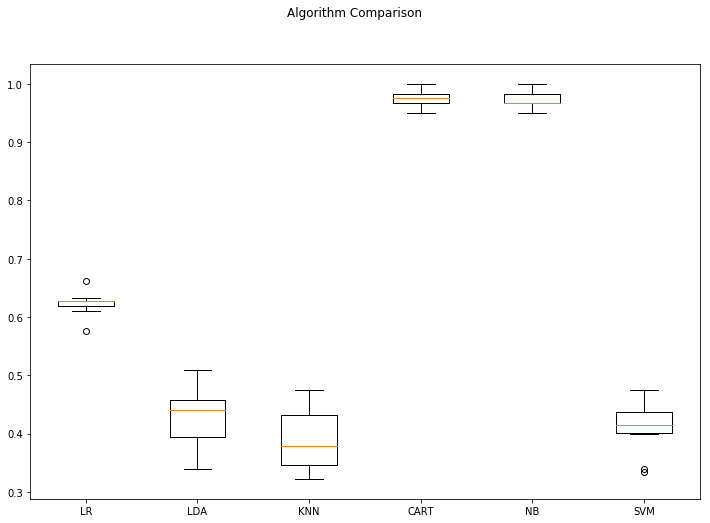

In [34]:
# Compare Algorithms
fig = pyplot.figure(figsize=(12, 8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Make Predictions
The NB algorithm was the most accurate model that we tested. Now we want to get an idea
of the accuracy of the model on our validation dataset. This will give us an independent nal
check on the accuracy of the best model. It is important to keep a validation set just in case
you made a slip during training, such as overtting to the training set or a data leak. Both
will result in an overly optimistic result. We can run the KNN model directly on the validation
set and summarize the results as a nal accuracy score, a confusion matrix and a classication
report.

In [35]:
from sklearn.naive_bayes import GaussianNB

# Make predictions on validation dataset
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9864864864864865
[[11  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 39  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        19
         2.0       1.00      1.00      1.00        31
         3.0       1.00      1.00      1.00        27
         4.0       1.00      1.00      1.00         9
         5.0       1.00      1.00      1.00         2
         8.0       1.00      1.00      1.00        39
 

/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [36]:
Y_train

array([ 40.,   3.,   2.,   2.,   8.,  40.,   2.,   2.,  16.,   1.,   3.,
         1.,   8.,   1.,   4.,   8.,   8.,   2.,   4.,   1.,   1.,   8.,
         8.,   2.,   2., 112.,   3.,   2.,   3.,   3.,   0.,   1.,   1.,
         3.,   4.,   8.,   8.,   2.,   0.,   3.,   8.,   8.,   0.,   0.,
         1.,   2.,   0.,   2.,   1.,   8.,   2.,   2.,   1.,   2.,   1.,
         2.,   8.,   3.,   2.,   1.,   1.,   4.,   8.,   8.,   3.,  16.,
         1.,   4.,   2.,   8.,  48.,   2.,   0.,   2.,   2.,   0.,   4.,
         1.,   1.,   1.,   2.,   2.,   3.,   8.,   8.,   7.,   2.,   8.,
         2.,   4.,   8.,   2.,   2.,   3.,   4.,   2.,   0.,   8.,   2.,
         8.,   3.,   2.,   3.,   3.,   8.,   8.,   8.,   0.,  24.,   2.,
         2.,   4.,   4.,   8.,   8.,   8.,   3.,   1.,   4.,   1.,   8.,
         3.,   8.,   8.,   2.,   8.,   1.,   4.,   8.,   0.,   3.,   3.,
         3.,   8.,   8.,   8.,   8.,   0.,   4.,   2.,   4.,   2.,   8.,
        24.,   2.,   2.,   8.,   3.,   8.,   1.,   